In [54]:
# Import-o-rama
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [55]:
# Read CSV files
hk_questions = pd.read_csv('Data/questions.csv')
hk_answers = pd.read_csv('Data/answers.csv')
hk_survey_year = pd.read_csv('Data/survey.csv')

In [56]:
# Merge Questions and answers
hk_survey_data = pd.merge(hk_questions , hk_answers , left_on='questionid' , right_on='QuestionID')

# Filter questions for HK, probably won't need all of these [1, 2, 33, 48, 49, 54, 55, 89, 92, 118]
hk_question_ids = [1, 2, 33, 48, 49, 54, 55, 89, 92, 118] 
hk_filtered_df = hk_survey_data[hk_survey_data['QuestionID'].isin(hk_question_ids)]
hk_filtered_df = hk_filtered_df.rename(columns={'questiontext' : 'Questions' , 'AnswerText' : 'Answers' , 'SurveyID' : 'Year'})
hk_filtered_df.head()

,Unnamed: 0_x,Questions,questionid,Unnamed: 0_y,Answers,Year,UserID,QuestionID
0,0,What is your age?,1,0,37,2014,1,1
1,0,What is your age?,1,1,44,2014,2,1
2,0,What is your age?,1,2,32,2014,3,1
3,0,What is your age?,1,3,31,2014,4,1
4,0,What is your age?,1,4,31,2014,5,1


In [57]:
 # Pivoted dataframe to get questions as columns 
hk_pivoted_df = hk_filtered_df.pivot(index='UserID' , columns='Questions', values='Answers' )

# reorder columns
hk_pivoted_df = hk_pivoted_df[['What is your age?',
                         'What is your gender?',
                         'Do you currently have a mental health disorder?',
                         'If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?',
                         'If you have a mental health disorder, how often do you feel that it interferes with your work when not being treated effectively (i.e., when you are experiencing symptoms)?',
                         'Do you believe your productivity is ever affected by a mental health issue?',
                         'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?',
                         'What is your race?',
                         'If you have a mental health condition, do you feel that it interferes with your work?',
                         'Do you work remotely?',
                         ]]

# rename columns 
hk_pivoted_v2_df = hk_pivoted_df.rename(columns={'What is your age?' : 'Age',
                                           'What is your gender?': 'Gender',
                                           'Do you currently have a mental health disorder?':'Current MHD',
                                           'If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?': 'Interference when treated',
                                           'If you have a mental health disorder, how often do you feel that it interferes with your work when not being treated effectively (i.e., when you are experiencing symptoms)?': 'Interference when NOT treated',
                                           'Do you believe your productivity is ever affected by a mental health issue?': 'Productivity affected by MHD',
                                           'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?': '% of work time affected',
                                           'What is your race?': 'Race',
                                           'If you have a mental health condition, do you feel that it interferes with your work?': 'MHD Interference Frequency',
                                           'Do you work remotely?': 'Work remote'
                                           })
hk_pivoted_v2_df

Questions,Age,Gender,Current MHD,Interference when treated,Interference when NOT treated,Productivity affected by MHD,% of work time affected,Race,MHD Interference Frequency,Work remote
UserID,,,,,,,,,,
1,37,Female,NaN,NaN,NaN,NaN,NaN,NaN,Often,NaN
2,44,Male,NaN,NaN,NaN,NaN,NaN,NaN,Rarely,NaN
3,32,Male,NaN,NaN,NaN,NaN,NaN,NaN,Rarely,NaN
4,31,Male,NaN,NaN,NaN,NaN,NaN,NaN,Often,NaN
5,31,Male,NaN,NaN,NaN,NaN,NaN,NaN,Never,NaN
...,...,...,...,...,...,...,...,...,...,...
4214,27,male,Possibly,Sometimes,Sometimes,-1,-1,-1,NaN,NaN
4215,48,Male,No,Not applicable to me,Not applicable to me,Yes,26-50%,White,NaN,NaN
4216,50,Male,No,Never,Never,Unsure,-1,-1,NaN,NaN


In [58]:
## Do you currently have a mental health disorder?
# Merge redundant answers, remove NaN, and find counts
for index, row in hk_pivoted_v2_df.iterrows():
      if row[2] == "Maybe" or row[2] == "Possibly" or row[2] == "Don't Know":
            hk_pivoted_v2_df["Current MHD"] = hk_pivoted_v2_df["Current MHD"].replace(row[2], "Don't Know")
hk_mhd_status = hk_pivoted_v2_df["Current MHD"]
hk_mhd_status_counts = hk_mhd_status.value_counts()

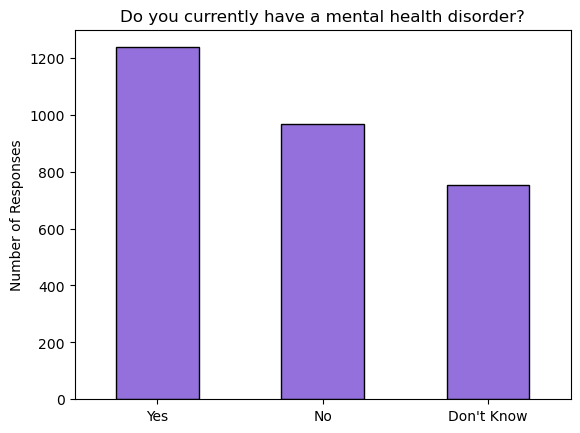

In [59]:
## Visualization for: Do you currently have a mental health disorder?
hk_mhd_status_counts.plot(kind='bar', rot=0, facecolor="mediumpurple", edgecolor = "black")
# Label some things
plt.title("Do you currently have a mental health disorder?")
plt.xlabel("")
plt.ylabel("Number of Responses")
plt.show()

In [60]:
# If you have a mental health disorder, does it affect productivity?
# Merge redundant answers, remove NaN, and display counts
hk_prod_answers = ["Yes", "Unsure", "No"]
hk_mhd_productivity = hk_pivoted_v2_df[hk_pivoted_v2_df["Productivity affected by MHD"].isin(hk_prod_answers)]
hk_mhd_productivity = hk_mhd_productivity["Productivity affected by MHD"]
hk_mhd_prod_counts = hk_mhd_productivity.value_counts()

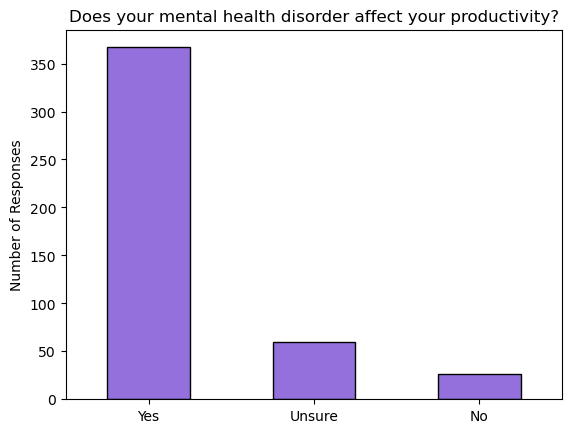

In [61]:
## Visualization for: Does your mental health disorder affect your productivity?
hk_mhd_prod_counts.plot(kind='bar', rot=0, facecolor="mediumpurple", edgecolor = "black")
# Label some things
plt.title("Does your mental health disorder affect your productivity?")
plt.xlabel("")
plt.ylabel("Number of Responses")
plt.show()

In [62]:
# If you have a mental health disorder, how often does it interfere with work?
# Merge redundant answers, remove NaN, and display counts
hk_freq_answers = ["Never", "Rarely", "Sometimes", "Often"]
hk_mhd_frequency = hk_pivoted_v2_df[hk_pivoted_v2_df["MHD Interference Frequency"].isin(hk_freq_answers)]
hk_mhd_frequency = hk_mhd_frequency["MHD Interference Frequency"]
hk_mhd_freq_counts = hk_mhd_frequency.value_counts()

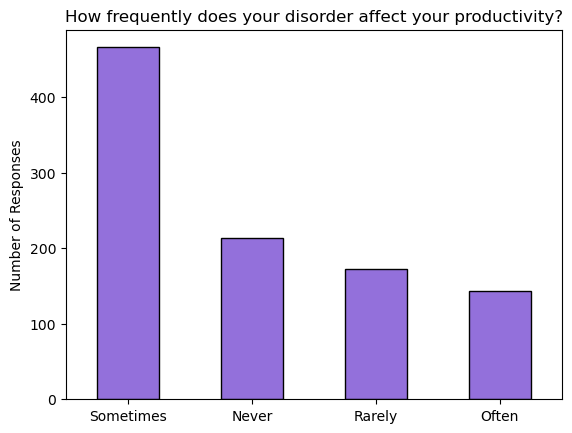

In [63]:
## Visualization for: How frequently does your disorder affect your productivity?
hk_mhd_freq_counts.plot(kind='bar', rot=0, facecolor="mediumpurple", edgecolor = "black")
# Label some things
plt.title("How frequently does your disorder affect your productivity?")
plt.xlabel("")
plt.ylabel("Number of Responses")
plt.show()